In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b827c15ad80446f675251d7bd20576a1eb149b4a5da109969048e70d5fa8310e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import os
import numpy as np
import pandas as pd
import wget
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [3]:

url = 'https://github.com/StuntShield/StuntShield-Stunting-Prediction-Model/raw/main/dataset/data_weight_balita.zip'

filename = wget.download(url, './data_weight_balita.zip')

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('./dataset/data_weight_balita')


In [4]:
data = pd.read_csv('./dataset/data_weight_balita/data_weight_balita.csv')
data

,Umur (bulan),Jenis Kelamin,Berat Badan (kg),Status
0,0,laki-laki,1.60,berat badan sangat kurang
1,0,laki-laki,1.61,berat badan sangat kurang
2,0,laki-laki,1.62,berat badan sangat kurang
3,0,laki-laki,1.63,berat badan sangat kurang
4,0,laki-laki,1.64,berat badan sangat kurang
...,...,...,...,...
186965,60,perempuan,29.96,risiko berat badan lebih
186966,60,perempuan,29.97,risiko berat badan lebih
186967,60,perempuan,29.98,risiko berat badan lebih
186968,60,perempuan,29.99,risiko berat badan lebih


In [5]:
data.isnull().sum()

Umur (bulan)        0
Jenis Kelamin       0
Berat Badan (kg)    0
Status              0
dtype: int64

In [6]:
data.describe()

,Umur (bulan),Berat Badan (kg)
count,186970.000000,186970.000000
mean,32.024330,16.241679
std,17.444762,5.570093
min,0.000000,1.500000
25%,17.000000,12.030000
50%,33.000000,15.950000
75%,47.000000,20.340000
max,60.000000,30.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186970 entries, 0 to 186969
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Umur (bulan)      186970 non-null  int64  
 1   Jenis Kelamin     186970 non-null  object 
 2   Berat Badan (kg)  186970 non-null  float64
 3   Status            186970 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
SDM3_LAKI_LAKI = [2.1,2.9,3.8,4.4,4.9,5.3,5.7,5.9,6.2,6.4,6.6,6.8,6.9,7.1,7.2,7.4,7.5,7.7,7.8,8.0,8.1,8.2,8.4,8.5,8.6,8.8,8.9,9.0,9.1,9.2,9.4,9.5,9.6,9.7,9.8,9.9,10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1,12.2,12.3,12.4]
print(len(SDM3_LAKI_LAKI))
SDM2_LAKI_LAKI = [2.5,3.4,4.3,5.0,5.6,6.0,6.4,6.7,6.9,7.1,7.4,7.6,7.7,7.9,8.1,8.3,8.4,8.6,8.8,8.9,9.1,9.2,9.4,9.5,9.7,9.8,10.0,10.1,10.2,10.4,10.5,10.7,10.8,10.9,11.0,11.2,11.3,11.4,11.5,11.6,11.8,11.9,12.0,12.1,12.2,12.4,12.5,12.6,12.7,12.8,12.9,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,14.0,14.1]
print(len(SDM2_LAKI_LAKI))
SD1_LAKI_LAKI = [3.9,5.1,6.3,7.2,7.8,8.4,8.8,9.2,9.6,9.9,10.2,10.5,10.8,11.0,11.3,11.5,11.7,12.0,12.2,12.5,12.7,12.9,13.2,13.4,13.6,13.9,14.1,14.3,14.5,14.8,15.0,15.2,15.4,15.6,15.8,16.0,16.2,16.4,16.6,16.8,17.0,17.2,17.4,17.6,17.8,18.0,18.2,18.4,18.6,18.8,19.0,19.2,19.4,19.6,19.8,20.0,20.2,20.4,20.6,20.8,21.0]
print(len(SD1_LAKI_LAKI))
SD1_PEREMPUAN = [3.7,4.8,5.8,6.6,7.3,7.8,8.2,8.6,9.0,9.3,9.6,9.9,10.1,10.4,10.6,10.9,11.1,11.4,11.6,11.8,12.1,12.3,12.5,12.8,13.0,13.3,13.5,13.7,14.0,14.2,14.4,14.7,14.9,15.1,15.4,15.6,15.8,16.0,16.3,16.5,16.7,16.9,17.2,17.4,17.6,17.8,18.1,18.3,18.5,18.8,19.0,19.2,19.4,19.7,19.9,20.1,20.3,20.6,20.8,21.0,21.2]
print(len(SD1_PEREMPUAN))
SDM2_PEREMPUAN = [2.4,3.2,3.9,4.5,5.0,5.4,5.7,6.0,6.3,6.5,6.7,6.9,7.0,7.2,7.4,7.6,7.7,7.9,8.1,8.2,8.4,8.6,8.7,8.9,9.0,9.2,9.4,9.5,9.7,9.8,10.0,10.1,10.3,10.4,10.5,10.7,10.8,10.9,11.1,11.2,11.3,11.5,11.6,11.7,11.8,12.0,12.1,12.2,12.3,12.4,12.6,12.8,12.7,12.9,13.0,13.2,13.3,13.4,13.5,13.6,13.7]
print(len(SDM2_PEREMPUAN))
SDM3_PEREMPUAN = [2.0,2.7,3.4,4.0,4.4,4.8,5.1,5.3,5.6,5.8,5.9,6.1,6.3,6.4,6.6,6.7,6.9,7.0,7.2,7.3,7.5,7.6,7.8,7.9,8.1,8.2,8.4,8.5,8.6,8.8,8.9,9.0,9.1,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1]
print(len(SDM3_PEREMPUAN))

61
61
61
61
61
61


## Clean Kelas Berat badan sangat kurang

### Laki-Laki

In [9]:
for i in range(len(SDM3_LAKI_LAKI)):
  clean_sangat_kurang = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      (data['Berat Badan (kg)'] >= SDM3_LAKI_LAKI[i]) &
      (data['Status'] == 'berat badan sangat kurang')
  )
  data = data.drop(data[clean_sangat_kurang].index)

### Perempuan


In [10]:
for i in range(len(SDM3_PEREMPUAN)):
  clean_sangat_kurang = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      ((data['Berat Badan (kg)'] >= SDM3_PEREMPUAN[i])) &
      (data['Status'] == 'berat badan sangat kurang')
  )
  data = data.drop(data[clean_sangat_kurang].index)


## Clean Kelas berat badan kurang


### Laki-Laki


In [11]:
for i in range(len(SDM3_LAKI_LAKI)) :
  clean_kurang = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      ((data['Berat Badan (kg)'] < SDM3_LAKI_LAKI[i]) | (data['Berat Badan (kg)'] >= SDM2_LAKI_LAKI[i]) ) &
      (data['Status'] == 'berat badan kurang')
  )
  data = data.drop(data[clean_kurang].index)



### Prempuan


In [12]:
for i in range(len(SDM3_PEREMPUAN)) :
  clean_kurang = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      ((data['Berat Badan (kg)'] < SDM3_PEREMPUAN[i]) | (data['Berat Badan (kg)'] >= SDM2_PEREMPUAN[i]) ) &
      (data['Status'] == 'berat badan kurang')
  )
  data = data.drop(data[clean_kurang].index)

## Clean Kelas berat badan normal


### Laki-Laki

In [13]:
for i in range(len(SDM3_LAKI_LAKI)) :
  clean_normal = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      ((data['Berat Badan (kg)'] < SDM2_LAKI_LAKI[i]) | (data['Berat Badan (kg)'] > SD1_LAKI_LAKI[i])) &
      (data['Status'] == 'berat badan normal')
  )
  data = data.drop(data[clean_normal].index)

### Perempuan

In [14]:
for i in range(len(SDM3_PEREMPUAN)) :
  clean_normal = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      ((data['Berat Badan (kg)'] < SDM2_PEREMPUAN[i]) | (data['Berat Badan (kg)'] > SD1_PEREMPUAN[i])) &
      (data['Status'] == 'berat badan normal')
  )
  data = data = data.drop(data[clean_normal].index)

## Clean Kelas Risiko Berat badan lebih

### Laki-Laki


In [15]:
for i in range(len(SDM3_LAKI_LAKI)) :
  clean_risiko_lebih = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'laki-laki') &
      (data['Berat Badan (kg)'] < SD1_LAKI_LAKI[i] ) &
      (data['Status'] == 'risiko Berat badan lebih')
  )
  data = data = data.drop(data[clean_risiko_lebih].index)



### Perempuan

In [16]:
for i in range(len(SDM3_PEREMPUAN)) :
  clean_risiko_lebih = (
      (data['Umur (bulan)'] == i) &
      (data['Jenis Kelamin'] == 'perempuan') &
      (data['Berat Badan (kg)'] < SD1_PEREMPUAN[i] ) &
      (data['Status'] == 'risiko Berat badan lebih')
  )
  data = data.drop(data[clean_risiko_lebih].index)

In [17]:
data.describe()

,Umur (bulan),Berat Badan (kg)
count,186779.000000,186779.000000
mean,32.026973,16.249037
std,17.444683,5.567548
min,0.000000,1.500000
25%,17.000000,12.040000
50%,33.000000,15.950000
75%,47.000000,20.350000
max,60.000000,30.000000


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.duplicated().sum()

0

In [20]:
data.describe()

,Umur (bulan),Berat Badan (kg)
count,186779.000000,186779.000000
mean,32.026973,16.249037
std,17.444683,5.567548
min,0.000000,1.500000
25%,17.000000,12.040000
50%,33.000000,15.950000
75%,47.000000,20.350000
max,60.000000,30.000000


## Encode Jenis Kelamin dan Kelas ke number

In [21]:
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
data['Status'] = data['Status'].map({'berat badan sangat kurang': 0, 'berat badan kurang': 1, 'berat badan normal': 2, 'risiko berat badan lebih': 3})

data

,Umur (bulan),Jenis Kelamin,Berat Badan (kg),Status
0,0,0,1.60,0
1,0,0,1.61,0
2,0,0,1.62,0
3,0,0,1.63,0
4,0,0,1.64,0
...,...,...,...,...
186965,60,1,29.96,3
186966,60,1,29.97,3
186967,60,1,29.98,3
186968,60,1,29.99,3


In [22]:
dt_train=data.drop('Status', axis=1)

dt_train

,Umur (bulan),Jenis Kelamin,Berat Badan (kg)
0,0,0,1.60
1,0,0,1.61
2,0,0,1.62
3,0,0,1.63
4,0,0,1.64
...,...,...,...
186965,60,1,29.96
186966,60,1,29.97
186967,60,1,29.98
186968,60,1,29.99


In [23]:
label_train = data['Status']

label_train

0         0
1         0
2         0
3         0
4         0
         ..
186965    3
186966    3
186967    3
186968    3
186969    3
Name: Status, Length: 186779, dtype: int64

In [24]:
X_train, X_val, y_train, y_val = train_test_split(dt_train, label_train, test_size=0.2,stratify=label_train, random_state=42)

In [25]:
def lr_scheduler(epoch):
    # Menghitung kecepatan pembelajaran berdasarkan epoch
    return 0.001 * np.exp(-0.1 * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=15,
    restore_best_weights=True
)

In [28]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(dt_train.shape[1],)),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_model = model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=100,callbacks=[lr_callback, callback])

Epoch 1/100
4670/4670 [==============================] - 11s 2ms/step - loss: 0.2767 - accuracy: 0.8890 - val_loss: 0.1379 - val_accuracy: 0.9535 - lr: 0.0010
Epoch 2/100
4670/4670 [==============================] - 11s 2ms/step - loss: 0.1065 - accuracy: 0.9665 - val_loss: 0.0869 - val_accuracy: 0.9732 - lr: 9.0484e-04
Epoch 3/100
4670/4670 [==============================] - 9s 2ms/step - loss: 0.0771 - accuracy: 0.9761 - val_loss: 0.0676 - val_accuracy: 0.9794 - lr: 8.1873e-04
Epoch 4/100
4670/4670 [==============================] - 11s 2ms/step - loss: 0.0640 - accuracy: 0.9795 - val_loss: 0.0876 - val_accuracy: 0.9623 - lr: 7.4082e-04
Epoch 5/100
4670/4670 [==============================] - 12s 3ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0503 - val_accuracy: 0.9864 - lr: 6.7032e-04
Epoch 6/100
4670/4670 [==============================] - 10s 2ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0441 - val_accuracy: 0.9899 - lr: 6.0653e-04
Epoch 7/100
4670/4670 [====

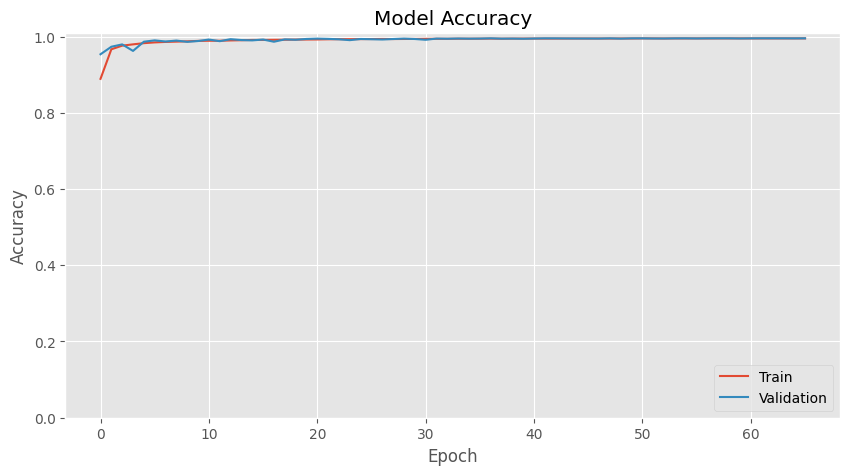

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Model Accuracy')
plt.plot(history_model.history['accuracy'], label='Accuracy')
plt.plot(history_model.history['val_accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.ylim([0, 1.01])
plt.show()

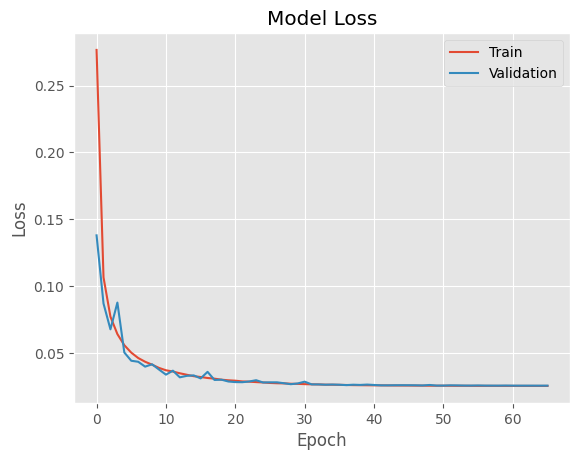

In [30]:
plt.plot(history_model.history['loss'], label='Training Loss')
plt.plot(history_model.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [31]:
model.save('./models/weight_prediction.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
